#**Exploration of op_pandas functionality using custom dataset**

**Instaling antigranular**

In [33]:
!pip install antigranular

You should consider upgrading via the 'C:\Users\kshub\OneDrive\Documents\Oblivious\env\Scripts\python.exe -m pip install --upgrade pip' command.


**Connecting to ag server**

In [36]:
import antigranular as ag
ag_client  = ag.login(<client_id>,<client_secret>, "comp_dataset_id", "temp_username", "temp_password")

Dataset "The Wine Dataset" loaded to the kernel as the_wine_dataset
Key Name                       Value Type     
---------------------------------------------
train_x                        PrivateDataFrame
train_y                        PrivateDataFrame
test_x                         DataFrame      

Connected to Antigranular server session id: b9929127-0c58-4b73-b510-16c6c2f30a75, the session will time out if idle for 25 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


**Importing necessary libraries or tools**

In [39]:
%%ag
from ag_utils import export
from op_pandas import PrivateDataFrame , PrivateSeries
import pandas as pd
import numpy as np

# Analysis of self-made dataframe of random numbers


In [40]:
%%ag
#creating dataframe of random numbers for analysis
data=np.random.randint(1,10000, size=(10000,4))
col_name=['col_1','col_2','col_3','col_4']
df=pd.DataFrame(data, columns=col_name)
df_new=PrivateDataFrame(df,metadata={'col_1': (1,10000),'col_2': (1,10000),'col_3': (1,10000),'col_4':(1,10000)})

In [ ]:
%%ag
#Calculating the mean of "col_1" in df_new
avg=df_new['col_1'].mean(eps=0.1)
## Export information from remote ag kernel to local jupyter server.
export(avg,'avg')

Setting up exported variable in local environment: avg


In [ ]:
#printing the average value of "col_1"
print(avg)

4959.7938641219225


In [ ]:
%%ag
#calling of describe method on the dataframe
priv_describe = df_new.describe(eps=0.1)
# Export information from remote ag kernel to local jupyter server.
export(priv_describe , 'df_info')

Setting up exported variable in local environment: df_info


In [ ]:
#printing the describe method output
print(df_info)

             col_1         col_2        col_3         col_4
count  9773.000000  11098.000000  9998.000000  10862.000000
mean   4944.519157   4591.769872  4853.113061   4918.978972
std    3781.490191   4012.343209  1470.613200   2640.487992
min     320.271139    491.272941   441.722393     67.116392
25%    2734.726818   1648.930599  2422.797703   2627.728794
50%    5011.479213   5933.211970  6072.820970   5593.099499
75%    7735.744405   7658.765891  7005.933480   7311.305429
max    9552.230449   9676.524829  9981.277032   9775.662081


In [ ]:
%%ag
#calling dropna method over the dataframe to drop nan values
export(df_new.dropna(axis=0).describe(eps=0.1), 'result')

Setting up exported variable in local environment: result


In [ ]:
#printing the resultant dataframe
print(result)

              col_1         col_2        col_3         col_4
count  10313.000000  10157.000000  9833.000000  10193.000000
mean    5262.074600   5828.014994  4875.008130   5087.891643
std     3347.240687   2428.189350  3362.279678   1035.885479
min      480.199089    118.050690   297.508042   1290.531173
25%     2450.484237   1110.004475  1282.470214   2700.612360
50%     3929.110358   4965.089699  5645.459482   4389.911281
75%     7081.321683   7625.224220  9289.374930   7767.923807
max     9724.046880   9520.078676  8872.527810   9555.130147


In [41]:
%%ag
#making a new copy of the dataframe
df_new_copied= df_new.copy()

In [42]:
%%ag
des=df_new_copied.describe(eps=0.1 )
export(des,'des')

Setting up exported variable in local environment: des


In [43]:
print(des)

             col_1         col_2        col_3        col_4
count  9958.000000  10191.000000  9851.000000  9688.000000
mean   4854.134084   5161.745173  4855.590109  5012.216698
std    3194.972089   3404.024317  3336.633348  2862.554092
min     292.281858    857.099882   761.092067   108.012014
25%    2220.625682   2588.135349  2108.465572   937.999412
50%    4700.337713   5154.710960  5094.042464  5133.129865
75%    7882.546332   7907.736447  8140.918892  7702.720645
max    9905.583715   9660.812300  9751.358246  9571.679421


In [ ]:
%%ag
#calculating sum over each column
sum=df_new.sum(eps = 0.1, axis=0, skipna=True, min_count=0)
export(sum,'sum')

Setting up exported variable in local environment: sum


In [ ]:
#printing the sum of each column
print(sum)

col_1    4.976448e+07
col_2    4.958078e+07
col_3    4.999435e+07
col_4    5.000862e+07
dtype: float64


In [ ]:
%%ag
#calculating variance over each column
var=df_new.var(eps = 0.1, axis=0, skipna=True, ddof=1)
export(var,'var')

Setting up exported variable in local environment: var


In [ ]:
#printing the variance of each column
print(var)

col_1    8.296305e+06
col_2    6.912732e+06
col_3    8.398227e+06
col_4    8.263877e+06
dtype: float64


In [ ]:
%%ag
#calling count over each column
count=df_new.count(eps = 0.1, axis=0, numeric_only=False)
export(count,'count')


Setting up exported variable in local environment: count


In [ ]:
#printing the count of each column
print(count)

col_1     9989
col_2    10062
col_3    10000
col_4    10000
dtype: int64


In [ ]:
%%ag
hist=df_new.hist('col_1', eps=0.1, bins = 10)
export(hist,'hist')


Setting up exported variable in local environment: hist


In [ ]:
#plotting histograme over the columns of dataframe
import plotly.graph_objects as go
dp_hist, dp_bins = hist
fig = go.Figure(data=[go.Bar(x=dp_bins[:-1], y=dp_hist)])
fig.show()

In [ ]:
%%ag
hist2=df_new.hist2d(eps=0.1, x='col_1', y='col_2', bins = 10)
export(hist2,'hist2')


Setting up exported variable in local environment: hist2


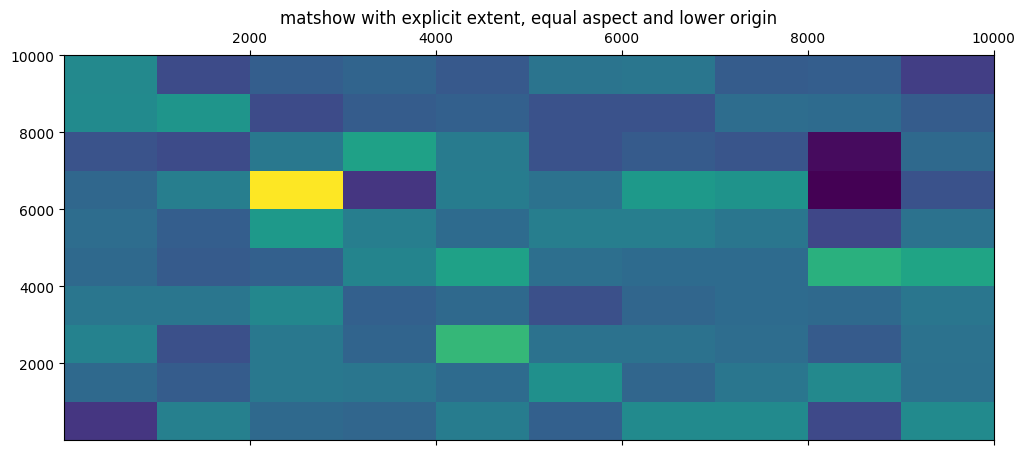

In [ ]:
#Creating a 2d histogram among two of the columns of the PrivateDataFrame.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))
h, xbins , ybins= hist2
ax.matshow(h, extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]], aspect='auto', origin='lower')
ax.set_title('matshow with explicit extent, equal aspect and lower origin')
plt.show()

In [ ]:
print(hist2)

(array([[ 95.,  84., 104.,  97., 103., 102.,  95., 115.,  93., 105.],
       [121.,  74., 138.,  92., 119.,  95.,  86.,  97.,  83., 101.],
       [ 87., 102., 103.,  89.,  93.,  93., 117., 105., 103.,  92.],
       [108., 101.,  79., 132., 118.,  81., 107.,  80.,  85.,  92.],
       [ 80., 116., 102., 109., 114., 113., 100., 107., 121.,  86.],
       [ 90.,  91.,  65., 105.,  86., 109., 120., 125., 106.,  54.],
       [ 97., 101., 102., 113., 104., 117., 111., 120.,  87., 122.],
       [127., 102.,  73.,  93., 107.,  89.,  79., 114., 111.,  81.],
       [140.,  89.,  79., 111., 138., 119.,  85.,  85., 108.,  92.],
       [ 77., 108., 104.,  98., 112., 102., 124., 114.,  91.,  98.]]), array([1.0000e+00, 1.0009e+03, 2.0008e+03, 3.0007e+03, 4.0006e+03,
       5.0005e+03, 6.0004e+03, 7.0003e+03, 8.0002e+03, 9.0001e+03,
       1.0000e+04]), array([1.0000e+00, 1.0009e+03, 2.0008e+03, 3.0007e+03, 4.0006e+03,
       5.0005e+03, 6.0004e+03, 7.0003e+03, 8.0002e+03, 9.0001e+03,
       1.0000e+04]

In [ ]:
%%ag
#calculating quantile over each column with q=0.5
quant=df_new.quantile(eps=0.1, q = 0.5)
export(quant,'quant')

Setting up exported variable in local environment: quant


In [ ]:
print(quant)

col_1    4897.884609
col_2    4935.474070
col_3    4999.982130
col_4    5036.810357
dtype: float64


In [ ]:
%%ag
#calculating medium over each column
median=df_new.median(eps=0.1)
export(median,'median')

Setting up exported variable in local environment: median


In [ ]:
print(median)

col_1    4894.685748
col_2    4923.683466
col_3    5000.100590
col_4    5037.502416
dtype: float64


In [ ]:
%%ag
#calculating percentile over each column
percent=df_new.percentile(0.1, 1)
export(percent,'percent')


Setting up exported variable in local environment: percent


In [ ]:
print(percent)

col_1     80.581633
col_2    114.153564
col_3     93.226417
col_4    140.562941
dtype: float64


In [ ]:
%%ag
#calculating covariance between two columns
cov=df_new.cov(0.1, ddof = 1, numeric_only = True)
export(cov,'cov')

Setting up exported variable in local environment: cov


In [ ]:
print(cov)

                col_1           col_2            col_3           col_4
col_1  8325228.002492 -1603703.667536   -438755.703632  2578833.750208
col_2 -1603703.667536  7914317.891357  -1060268.597716  1583160.160166
col_3  -438755.703632 -1060268.597716  11379806.477133  -747084.469104
col_4  2578833.750208  1583160.160166   -747084.469104  8126808.302662


In [ ]:
%%ag
#calculating skew values of columns
sk=df_new.skew(eps=0.1, axis = 0, skipna = True, numeric_only = True)
export(sk,'sk')

Setting up exported variable in local environment: sk


In [ ]:
print(sk)

col_1    0.234456
col_2    0.230089
col_3   -0.044036
col_4   -0.320443
dtype: float64


In [ ]:
%%ag
#calculating covariance between  columns
cor=df_new.cov(eps=0.1, method="pearson", numeric_only = True)
export(cor,'cor')

Setting up exported variable in local environment: cor


In [ ]:
print(cor)

                col_1           col_2           col_3           col_4
col_1  9692863.062363  1039479.592037 -1205488.515126  3837137.955826
col_2  1039479.592037  8100866.277185   -45953.965513 -2979430.913883
col_3 -1205488.515126   -45953.965513  9277662.717398    323086.20231
col_4  3837137.955826 -2979430.913883    323086.20231  8252030.969724


In [59]:
%%ag
#applying a function over the dataframe
def func (a : int)->int:
  return a+2
map_val=df_new.applymap(func, eps = 1)
describe=map_val.describe(eps=0.1)
export(describe,'describe')


Setting up exported variable in local environment: describe


In [60]:
print(describe)

              col_1         col_2         col_3         col_4
count  10044.000000   9898.000000  10318.000000  10164.000000
mean    5110.100568   5180.909981   5693.171449   6493.427743
std     3514.812723   3774.337599   6386.355735   2544.065945
min      461.150279    364.043254    222.324349   1319.835983
25%     1467.591134   3247.898213   1570.278822   2643.279796
50%     4403.612178   7010.176731   4303.229293   5356.835829
75%     7292.262005   7335.293888   7402.110407   7676.780626
max    10629.722138  15493.571732  10412.233683  11710.134489


In [ ]:
%%ag
#adding a new column to the dataframe
df_joined=df_new.join(df_new['col_1'],how = "left",lsuffix = "",rsuffix = "",sort = False)
desc=df_joined.describe(eps=0.1)
export(desc,'desc')


Total epsilon spent = 0.1000

Setting up exported variable in local environment: desc


In [ ]:
print(desc)

              col_1         col_2         col_3         col_4        series
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean    5320.635249   4818.179615   5142.608259   5117.827064   5083.407300
std     4235.639519   3125.000710   4214.390681   1055.190944   2906.100796
min       72.496585    639.688658    635.722056    792.085549      2.000000
25%     2985.777157   2963.828368   1715.304362   2028.287092   2561.000000
50%     2660.354684   4717.157504   3703.289932   5381.011787   5150.500000
75%     5440.265957   7073.382880   7205.139338   7160.785130   7571.250000
max     9693.360734   9265.648474   8025.847270   9334.908813   9998.000000


In [ ]:
%%ag
#calling where method over the dataframe
con=df_new.where(df_new>5000,inplace = False)
desc2=con.describe(eps=0.1)
export(desc2,'desc2')

Total epsilon spent = 0.1000

Setting up exported variable in local environment: desc2


In [ ]:
print(desc2)

              col_1         col_2         col_3         col_4
count  10000.000000  10000.000000  10000.000000  10000.000000
mean    7425.183782   7410.662576   7561.199153   7094.393938
std     3476.783611   4614.602658   2122.695267    613.687115
min      172.543248    124.978178   1329.723195   4091.694289
25%     7172.824082   5513.030047   6679.904657   6465.030901
50%     7409.017864   8206.913510   6993.049825   7370.865080
75%     9322.606917   8655.377896   8021.089352   7648.228530
max     8636.033127   9783.086339   9786.707764   9458.924434
